In [17]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [18]:
np.random.seed(2025)
pd.options.display.float_format = '{:,.5f}'.format
pio.renderers.default = 'vscode'

In [19]:
data = pd.read_csv('data/Groceries_dataset.csv')

In [20]:
data.sample(50)

,Member_number,Date,itemDescription
32362,1699,07-07-2015,rolls/buns
11383,2946,20-09-2014,rolls/buns
29047,1434,28-11-2014,condensed milk
33470,1062,08-05-2014,white bread
17813,2184,07-12-2015,beverages
1152,2868,20-03-2015,pork
25554,3621,04-01-2014,citrus fruit
37363,4509,30-07-2014,shopping bags
13847,2873,23-05-2014,rolls/buns
16865,2608,19-09-2015,other vegetables


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [22]:
data.describe()

,Member_number
count,"38,765.00000"
mean,"3,003.64187"
std,"1,153.61103"
min,"1,000.00000"
25%,"2,002.00000"
50%,"3,005.00000"
75%,"4,007.00000"
max,"5,000.00000"


In [23]:
data.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [24]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)
data = data.sort_values(by='Date')

In [25]:
data[data['Date'] == '21-07-2015']['Member_number'].value_counts()

Member_number
3814    9
1008    8
4486    7
1997    5
4108    5
4736    5
1345    5
4328    4
2222    4
4895    4
2961    4
3128    3
4429    3
3215    3
3505    3
1808    3
3318    2
3585    2
3812    2
1551    2
2769    2
1553    2
1285    2
3500    2
2253    2
Name: count, dtype: int64

In [26]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Month'] = data['Date'].dt.to_period('M').dt.to_timestamp()

monthly_counts = data.groupby(
    'Month').size().reset_index(name='Purchase Count')

fig = px.area(monthly_counts, x='Month', y='Purchase Count',
              title='Monthly Purchase Trends',
              labels={'Month': 'Month', 'Purchase Count': 'Number of Purchases'},
              color_discrete_sequence=['#636EFA'],
              template='plotly_white')

fig.show()

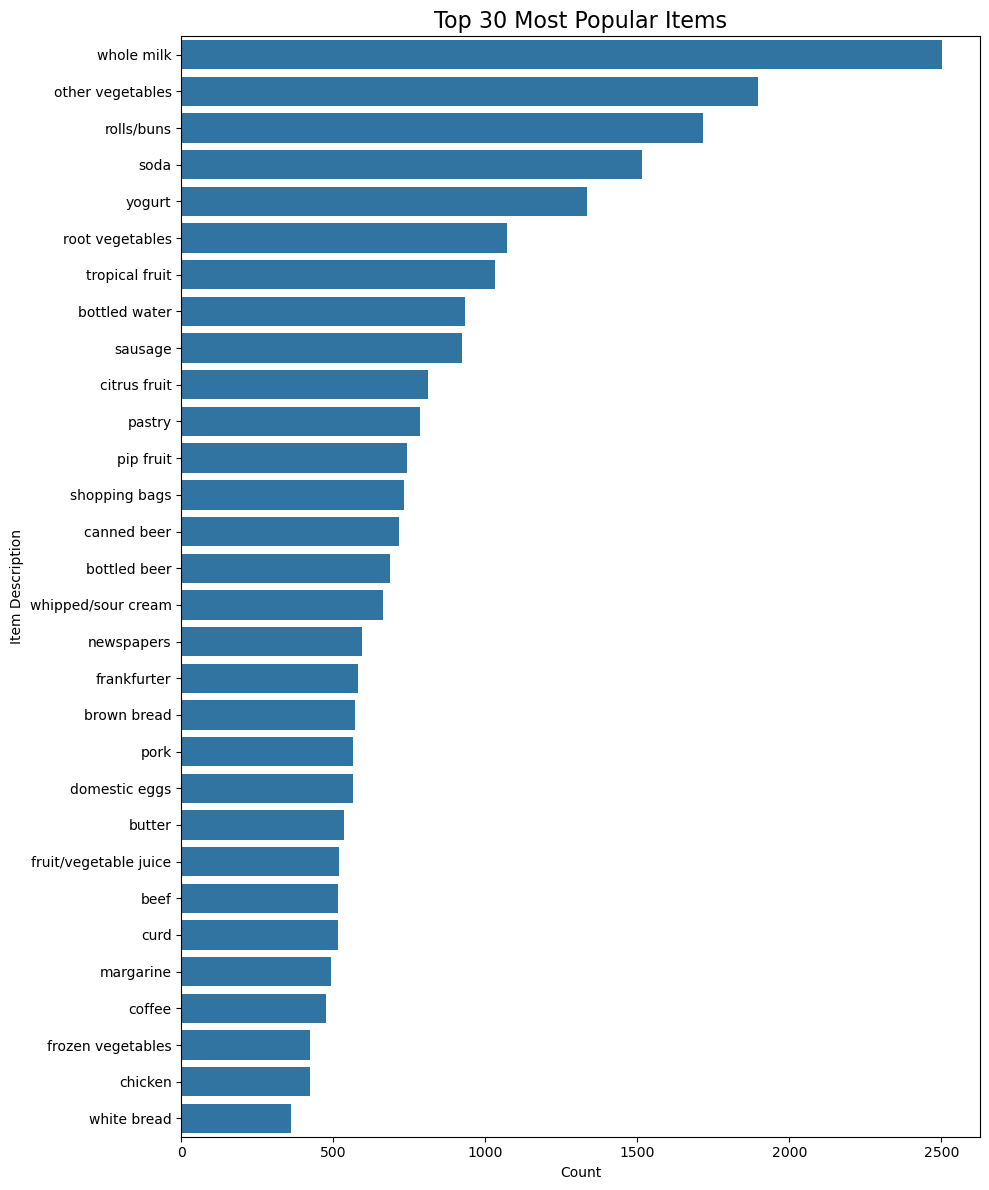

In [27]:
most_popular = data['itemDescription'].value_counts()[:30]

plt.figure(figsize=(10, 12))
sns.barplot(x=most_popular.values, y=most_popular.index,)
plt.title("Top 30 Most Popular Items", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Item Description")
plt.tight_layout()

plt.show() 


In [28]:
data['Month'] = data['Date'].dt.to_period('M').astype(str)

monthly_item_counts = data.groupby(
    ['Month', 'itemDescription']).size().reset_index(name='Count')

top_items_per_month = monthly_item_counts.sort_values(['Month', 'Count'], ascending=[True, False]) \
                                         .groupby('Month').first().reset_index()

fig = px.bar(
    top_items_per_month,
    x='Month',
    y='Count',
    text='itemDescription',
    title='Most Popular Product per Month',
    labels={'Count': 'Popularity', 'Month': 'Month'},
    template='plotly_white'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Number of Occurrences',
    xaxis_title='Month',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    margin=dict(l=40, r=40, t=60, b=100),
    height=500
)

fig.show()

In [29]:
grouped = data.groupby(['Date','Member_number'])['itemDescription'].apply(list).reset_index()

In [30]:
grouped

,Date,Member_number,itemDescription
0,2014-01-01,1249,"[coffee, citrus fruit]"
1,2014-01-01,1381,"[curd, soda]"
2,2014-01-01,1440,"[other vegetables, yogurt]"
3,2014-01-01,1659,"[frozen vegetables, specialty chocolate]"
4,2014-01-01,1789,"[candles, hamburger meat]"
...,...,...,...
14958,2015-12-30,3738,"[flour, onions]"
14959,2015-12-30,3971,"[bottled beer, brown bread]"
14960,2015-12-30,4058,"[cream cheese , domestic eggs]"
14961,2015-12-30,4565,"[canned beer, canned beer]"


In [31]:
transactions = grouped['itemDescription'].tolist()
transactions[:20]

[['coffee', 'citrus fruit'],
 ['curd', 'soda'],
 ['other vegetables', 'yogurt'],
 ['frozen vegetables', 'specialty chocolate'],
 ['candles', 'hamburger meat'],
 ['tropical fruit', 'other vegetables'],
 ['bottled water', 'sausage'],
 ['Instant food products', 'bottled water'],
 ['shopping bags', 'cleaner'],
 ['sliced cheese', 'bottled water'],
 ['domestic eggs', 'bottled beer', 'hamburger meat'],
 ['yogurt', 'frozen vegetables'],
 ['frozen potato products', 'hamburger meat'],
 ['whole milk', 'flower (seeds)'],
 ['bottled water', 'whipped/sour cream', 'berries'],
 ['dishes', 'onions', 'whipped/sour cream'],
 ['waffles', 'whole milk'],
 ['Instant food products', 'other vegetables', 'yogurt'],
 ['shopping bags', 'waffles', 'chocolate', 'yogurt'],
 ['brown bread', 'soda']]

In [32]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [33]:
df_encoded

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
display(frequent_itemsets.sort_values(by='support',ascending=False))
frequent_itemsets.describe()

,support,itemsets
146,0.15792,(whole milk)
90,0.12210,(other vegetables)
109,0.11000,(rolls/buns)
123,0.09711,(soda)
147,0.08588,(yogurt)
...,...,...
344,0.00100,"(chicken, margarine)"
201,0.00100,"(bottled beer, chicken)"
202,0.00100,"(chocolate, bottled beer)"
516,0.00100,"(hamburger meat, pastry)"


,support
count,750.00000
mean,0.00512
std,0.01235
min,0.00100
25%,0.00127
50%,0.00180
75%,0.00341
max,0.15792


In [35]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(
    lambda x: len(x))
print(frequent_itemsets[frequent_itemsets['length'] > 1])

     support                           itemsets  length
149  0.00107          (bottled water, UHT-milk)       2
150  0.00214       (other vegetables, UHT-milk)       2
151  0.00180             (rolls/buns, UHT-milk)       2
152  0.00100        (root vegetables, UHT-milk)       2
153  0.00114                (sausage, UHT-milk)       2
..       ...                                ...     ...
745  0.00114  (sausage, whole milk, rolls/buns)       3
746  0.00100     (whole milk, rolls/buns, soda)       3
747  0.00134   (yogurt, whole milk, rolls/buns)       3
748  0.00107        (sausage, whole milk, soda)       3
749  0.00147      (yogurt, sausage, whole milk)       3

[601 rows x 3 columns]


In [36]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules_simple = rules[['antecedents', 'consequents','support', 'confidence', 'lift']]
rules_simple = rules_simple.sort_values(by='confidence', ascending=False)
rules_simple = rules_simple[rules_simple['lift'] > 1.25]
display(rules_simple)

,antecedents,consequents,support,confidence,lift
447,"(yogurt, sausage)",(whole milk),0.00147,0.25581,1.61987
436,"(sausage, rolls/buns)",(whole milk),0.00114,0.21250,1.34559
449,"(sausage, whole milk)",(yogurt),0.00147,0.16418,1.91176
332,(processed cheese),(rolls/buns),0.00147,0.14474,1.31573
311,(packaged fruit/vegetables),(rolls/buns),0.00120,0.14173,1.28842
340,(seasonal products),(rolls/buns),0.00100,0.14151,1.28639
448,"(yogurt, whole milk)",(sausage),0.00147,0.13174,2.18292
402,(soft cheese),(yogurt),0.00127,0.12667,1.47495
157,(detergent),(yogurt),0.00107,0.12403,1.44426
100,(chewing gum),(yogurt),0.00140,0.11667,1.35851


In [37]:
rules_simple['antecedents_str'] = rules_simple['antecedents'].apply(
    lambda x: ', '.join(list(x)))
rules_simple['consequents_str'] = rules_simple['consequents'].apply(
    lambda x: ', '.join(list(x)))

fig = px.scatter(
    rules_simple,
    x="support",
    y="confidence",
    size="lift",
    color="lift",
    color_continuous_scale="Emrld",
    hover_data={
        "antecedents_str": True,
        "consequents_str": True,
        "support": False,
        "confidence": False,
        "lift": True
    },
    labels={
        "support": "Support",
        "confidence": "Confidence",
        "lift": "Lift",
        "antecedents_str": "Antecedents",
        "consequents_str": "Consequents"
    },
    title="Support vs Confidence"
)

fig.update_layout(
    template="plotly_white",
    title_x=0.5
    
)

fig.show()